In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
df_nlp = pd.read_csv('./lbh_data_exclusionsidentified_free_responses.csv')

In [3]:
df_nlp.head()

,Q55,Q58,Q61,Q64,Q67,Q72,Q74,Q78,Q79,Q81,...,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q133,Q130
0,In the event that you cannot get all your work...,What types of social activities are the most\n...,In the\n event that you cannot get all your e...,What types of things related to your other chi...,What aspect of this relationship with your sig...,Can you please tell us more about your experie...,Can you please tell us more about this experie...,Can you please tell us more about how your soc...,Can you please tell us more about having to de...,"When you do socialize, who are you likely to s...",...,What three things did you miss most about abou...,What three things do you think the child misse...,What three things about your hospital stay(s) ...,How could your hospital stay have been improved?,What important information about caring for th...,What advice would you give other caregivers in...,What additional services would have been usefu...,What other additional services would have been...,What are your concerns or worries about this t...,Thank you for your time and ideas. Is there an...
1,"House,",All social needs of parents,NaN,Tone,Any alone time,nurses at agencies are not paid enough. there...,Only at Camp Korey or with friends we trust.,I don't have one because there isn't tjme,Few people understand my daughter's needs and ...,I can't really think of anyone I socialize with,...,"Unity, peace, comfort",She's a baby,"Attentive staff, close monitoring, friendly en...",Softer sheets and better pillows.,So many things! I felt like we were told so li...,A lot,"Respite,Support for my other children",It wa long ago. This survey has been hard to a...,I have a lot of confidence in the hospitals wh...,Not at this time
2,I did not travel for work during that time per...,Time with other kids his age who weren't also ...,Myself,Their sporting events or even getting to play ...,Alone time,"We qualify for respite through DDA, but have n...",Stayed at grandmas,"Strengthened a few key relationships, but effe...",Too tired to go out,Watch bachelor with neighbors,...,"Soft blankets, pillows and quiet.",The same.,"Kind staff, expertise advice",?,I wish I had known how much I would think abou...,Treat every kid like theyre going to live thro...,Peer or professional support for self,More and better options for where to stay. We ...,I wanted to do it on my own. Perhaps if thing...,Please support Susan...she's amazing!!
3,"House, other siblings",All,Grocery shopping,School work,Anything not related to our daughter,Used a home health agency in Spokane to staff ...,"Some hospitalizations, but most night time car...",Made new friends but lost old friends,The mother often could not meet with friends o...,Only very close friends who are aware of her m...,...,Stressful worry,Family dogs friends her own bed,The expertise of the staff.,No complaints. Amazing staff like I said,She is under age 2,Ask for help,"Support for my other children,Help with social...",schooling,They killed my son..they lie about care and pr...,Never give up. It will be built.
4,At home:house keeping!\n\nLuckily I could work...,Nome,Self care,Celebrating their success. Spending time with ...,"Talking, connecting, sex, sharing common inter...",In the army,It is so difficult and complex for families wh...,NaN,Meds every 4-6 hours ( 17 different ones),Friends that come over to my house.,...,"Safe zone, own bed, familiarity","Her bedroom, her toys, her dogs",Nurses other familys,N/a,Money.,See above,"Respite,Peer or professional support for self,...",Services for disciplinadisciplinary actions on...,Cost,Couples need some time to themselves even if i...


In [4]:
df_nlp.shape

(132, 35)

In [5]:
list_of_questions = df_nlp.loc[0,:].values

In [6]:
# remove the questions
df_nlp.drop(df_nlp.index[0], inplace=True)

In [7]:
df_nlp.shape

(131, 35)

In [8]:
df_nlp.isnull().sum() # this is due to not having a uniform matrix size for each response from survey question 

Q55      93
Q58       9
Q61      44
Q64     107
Q67      37
Q72      19
Q74      83
Q78      14
Q79      59
Q81      20
Q82       0
Q84       5
Q92      24
Q98      10
Q99      12
Q100     97
Q101     17
Q103     50
Q104    107
Q111    117
Q114     40
Q116    109
Q119     66
Q120     92
Q121     33
Q122     32
Q123     34
Q124     32
Q125     47
Q126     57
Q127     55
Q128     22
Q129    121
Q133    126
Q130     89
dtype: int64

In [9]:
df_nlp.fillna('the', inplace=True) # use .fillna('the') to even out the matrix size, usinh 'the' because 
# it is in the stop_word list and therefore won't be   

df_nlp.isnull().sum()

Q55     0
Q58     0
Q61     0
Q64     0
Q67     0
Q72     0
Q74     0
Q78     0
Q79     0
Q81     0
Q82     0
Q84     0
Q92     0
Q98     0
Q99     0
Q100    0
Q101    0
Q103    0
Q104    0
Q111    0
Q114    0
Q116    0
Q119    0
Q120    0
Q121    0
Q122    0
Q123    0
Q124    0
Q125    0
Q126    0
Q127    0
Q128    0
Q129    0
Q133    0
Q130    0
dtype: int64

In [10]:
def question_nlp (dataframe, question):
    
    #Instantiate Count Vectorizer
    cvec = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10)
    
    #make a dataframe & vectorize the question input 
    df = pd.DataFrame(cvec.fit_transform(dataframe[question]).toarray(),
                           columns=cvec.get_feature_names())
    
    # from df, I am collecting the word_list and their associated counts (num_freq)
    # zip those into a list 
    word_list = df.columns
    num_freq = df.sum()
    df_entry = list(zip(word_list, num_freq))
    
  
    # return 
    return df_entry 

In [11]:
# questions numbers which will passed into a for loop 
q_num_list = [55, 58, 61, 64, 67, 81, 82,
              84, 92, 98, 99, 101, 119, 121, 122, 123, 124, 125, 128]

#question list to be passed into my function to make the formatting of the larger data set
q_list = []

#for loop irerateing through my
for num in q_num_list:
    
    q = "Q"
    
    num_var = str(num)
    combine = q + num_var
    
    q_list.append(combine)

In [12]:
print (q_list)

['Q55', 'Q58', 'Q61', 'Q64', 'Q67', 'Q81', 'Q82', 'Q84', 'Q92', 'Q98', 'Q99', 'Q101', 'Q119', 'Q121', 'Q122', 'Q123', 'Q124', 'Q125', 'Q128']


In [13]:
# Create a new dataframe
df_nlp_words = pd.DataFrame(columns=q_list)

for question in q_list:
    #to check progress 
    print(question)
    
    #setting the larger dataframe in the question 
    dataframe = df_nlp 
    
    #calling a function 
    df_nlp_words[question] = question_nlp(dataframe, question)




Q55
Q58
Q61
Q64
Q67
Q81
Q82
Q84
Q92
Q98
Q99
Q101
Q119
Q121
Q122
Q123
Q124
Q125
Q128


In [14]:
df_nlp_words.to_csv('./word_count_for_lbh_analysis.csv')

In [15]:
df_nlp_words

,Q55,Q58,Q61,Q64,Q67,Q81,Q82,Q84,Q92,Q98,Q99,Q101,Q119,Q121,Q122,Q123,Q124,Q125,Q128
0,"(care, 6)","(activities, 10)","(appointments, 11)","(activities, 5)","(child, 14)","(children, 6)","(care, 4)","(coffee, 10)","(anxiety, 33)","(children, 36)","(cancer, 20)","(board, 20)","(able, 9)","(days, 9)","(bed, 36)","(bed, 17)","(care, 16)","(bed, 10)","(assistance, 92)"
1,"(family, 4)","(date, 8)","(care, 16)","(couldn, 4)","(dates, 8)","(church, 7)","(daughter, 6)","(exercise, 34)","(depression, 20)","(children husband, 8)","(child, 14)","(board games, 18)","(bills, 12)","(exhausting, 18)","(family, 19)","(brother, 8)","(child, 12)","(better, 25)","(daily, 74)"
2,"(home, 6)","(events, 8)","(cleaning, 9)","(daughter, 3)","(intimacy, 7)","(close, 13)","(didn, 7)","(friends, 37)","(don, 12)","(daughter, 11)","(children, 12)","(camping, 16)","(care, 11)","(hard, 11)","(food, 23)","(family, 19)","(doctors, 9)","(food, 28)","(daily living, 74)"
3,"(house, 5)","(family, 20)","(groceries, 10)","(homework, 4)","(just, 11)","(close friends, 11)","(lot, 5)","(lunch, 20)","(health, 12)","(family, 54)","(daughter, 13)","(games, 47)","(family, 13)","(home, 11)","(having, 8)","(food, 8)","(help, 8)","(hospital, 8)","(errands, 74)"
4,"(housework, 6)","(friends, 46)","(grocery, 23)","(hospital, 9)","(kids, 8)","(family, 37)","(personal, 4)","(movies, 9)","(lot, 11)","(family friends, 16)","(family, 19)","(going, 13)","(home, 8)","(hospital, 26)","(home, 11)","(friends, 22)","(hospital, 8)","(let, 8)","(errands meals, 74)"
5,"(paperwork, 6)","(going, 13)","(grocery shopping, 18)","(kids, 4)","(personal, 7)","(friend, 9)","(personal time, 4)","(read, 48)","(ptsd, 11)","(friends, 29)","(finances, 14)","(hiking, 14)","(income, 8)","(room, 9)","(kids, 10)","(home, 14)","(life, 8)","(parents, 11)","(help, 145)"
6,"(self, 5)","(just, 8)","(personal, 12)","(parents, 3)","(sex, 8)","(friends, 63)","(really, 5)","(reading, 8)","(sleep, 17)","(god, 9)","(health, 31)","(movies, 36)","(medical, 8)","(sleep, 10)","(pets, 10)","(pets, 8)","(medical, 9)","(people, 9)","(house yard, 74)"
7,"(time, 8)","(school, 10)","(self, 11)","(school, 10)","(talking, 9)","(friends family, 7)","(son, 7)","(spa, 8)","(stress, 14)","(husband, 29)","(money, 29)","(park, 12)","(money, 17)","(stayed, 8)","(privacy, 15)","(room, 9)","(nurses, 59)","(room, 8)","(living, 74)"
8,"(work, 13)","(social, 16)","(self care, 10)","(stay, 4)","(time, 56)","(kids, 6)","(time, 24)","(time, 14)","(time, 30)","(kids, 32)","(son, 21)","(play, 22)","(time, 11)","(stressful, 24)","(sleep, 11)","(sleeping, 8)","(nurses nurses, 8)","(sleeping, 7)","(support, 113)"
9,"(worked, 5)","(time, 27)","(shopping, 35)","(time, 11)","(work, 9)","(son, 6)","(yes, 23)","(walk, 11)","(weight, 11)","(son, 10)","(work, 13)","(sports, 11)","(work, 13)","(time, 14)","(space, 12)","(toys, 15)","(staff, 24)","(time, 8)","(yard errands, 74)"


## Make Graphs 


### Inspired By: 

https://stackoverflow.com/questions/16010869/python-plot-a-bar-using-matplotlib-using-a-dictionary/16014873#16014873


``import matplotlib.pyplot as plt``

``data = {'apple': 67, 'mango': 60, 'lichi': 58}
names = list(data.keys())
values = list(data.values())``

``#tick_label does the some work as plt.xticks()
plt.bar(range(len(data)),values,tick_label=names)
plt.savefig('bar.png')
plt.show()``

## Make a Single Graph 

In [16]:
import matplotlib.pyplot as plt

In [17]:
# accesing the tuple 
t = df_nlp_words['Q55']

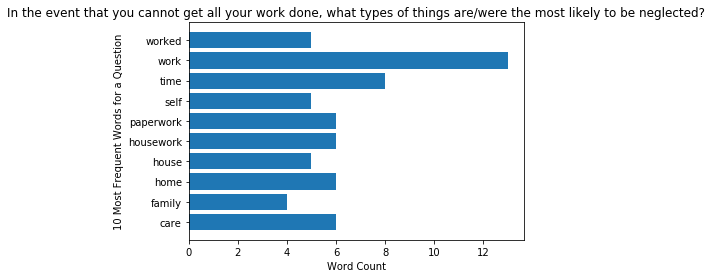

In [18]:
 data = dict((x, y) for x, y in t)
names = list(data.keys())
values = list(data.values())

plt.barh(range(len(data)), values, tick_label=names)
plt.xlabel('Word Count')
plt.ylabel('10 Most Frequent Words for a Question')
plt.savefig('bar.png')
plt.title(list_of_questions[0])

plt.show()

## Making Multiple Graphs at Once

Q55
0         (care, 6)
1       (family, 4)
2         (home, 6)
3        (house, 5)
4    (housework, 6)
5    (paperwork, 6)
6         (self, 5)
7         (time, 8)
8        (work, 13)
9       (worked, 5)
Name: Q55, dtype: object


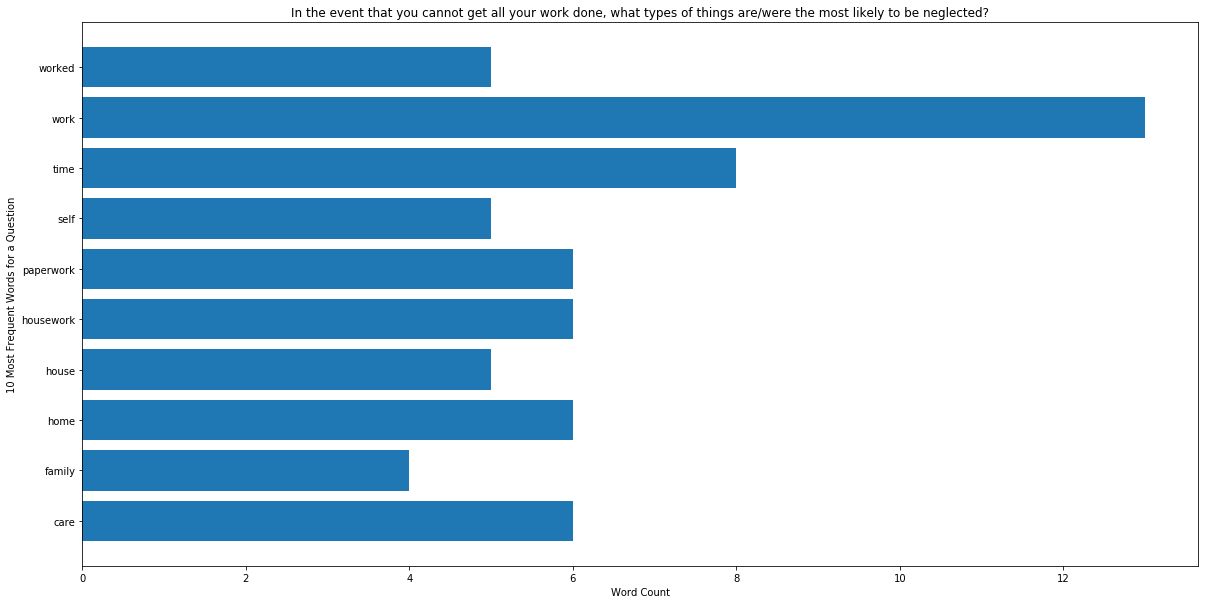

Q58
0    (activities, 10)
1           (date, 8)
2         (events, 8)
3        (family, 20)
4       (friends, 46)
5         (going, 13)
6           (just, 8)
7        (school, 10)
8        (social, 16)
9          (time, 27)
Name: Q58, dtype: object


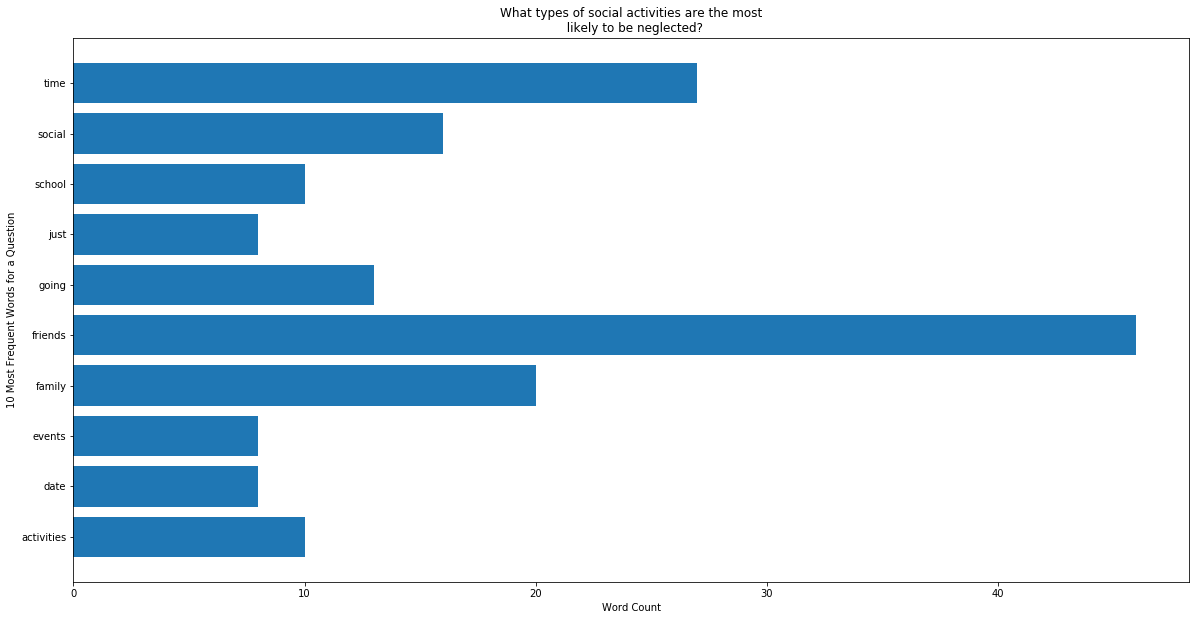

Q61
0        (appointments, 11)
1                (care, 16)
2             (cleaning, 9)
3           (groceries, 10)
4             (grocery, 23)
5    (grocery shopping, 18)
6            (personal, 12)
7                (self, 11)
8           (self care, 10)
9            (shopping, 35)
Name: Q61, dtype: object


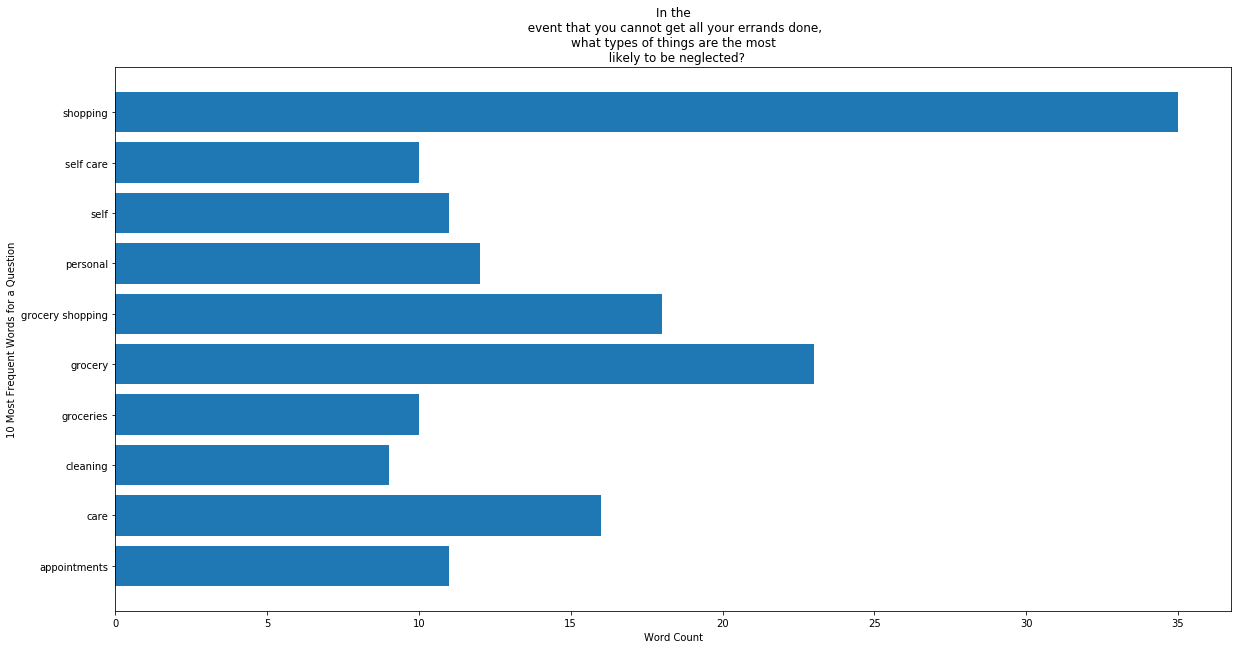

Q64
0    (activities, 5)
1        (couldn, 4)
2      (daughter, 3)
3      (homework, 4)
4      (hospital, 9)
5          (kids, 4)
6       (parents, 3)
7       (school, 10)
8          (stay, 4)
9         (time, 11)
Name: Q64, dtype: object


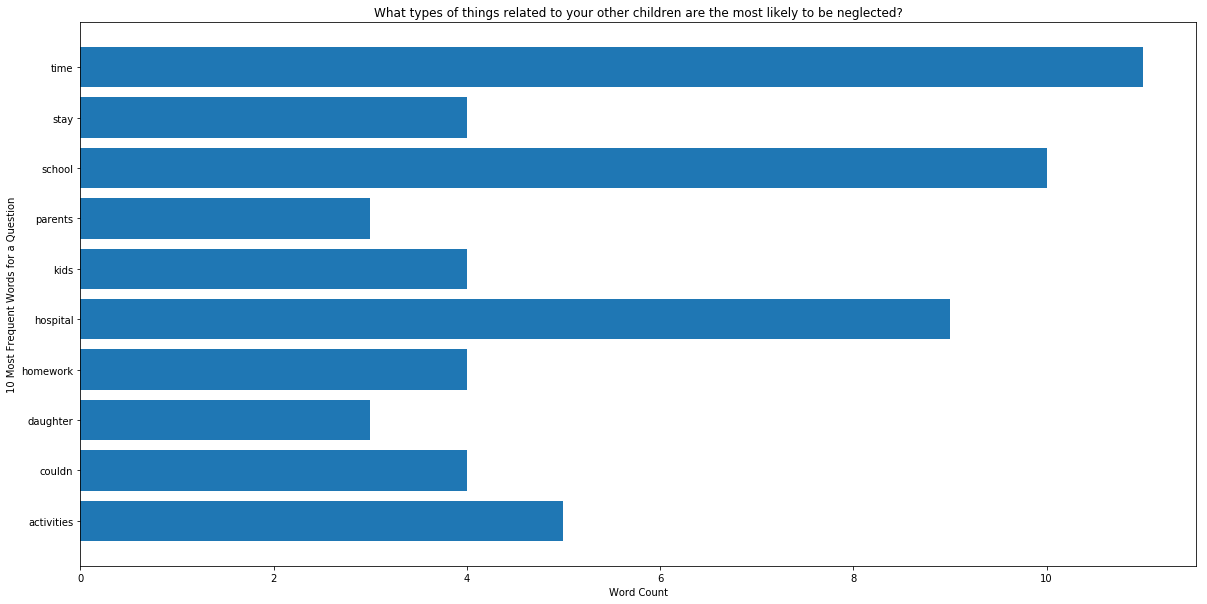

Q67
0      (child, 14)
1       (dates, 8)
2    (intimacy, 7)
3       (just, 11)
4        (kids, 8)
5    (personal, 7)
6         (sex, 8)
7     (talking, 9)
8       (time, 56)
9        (work, 9)
Name: Q67, dtype: object


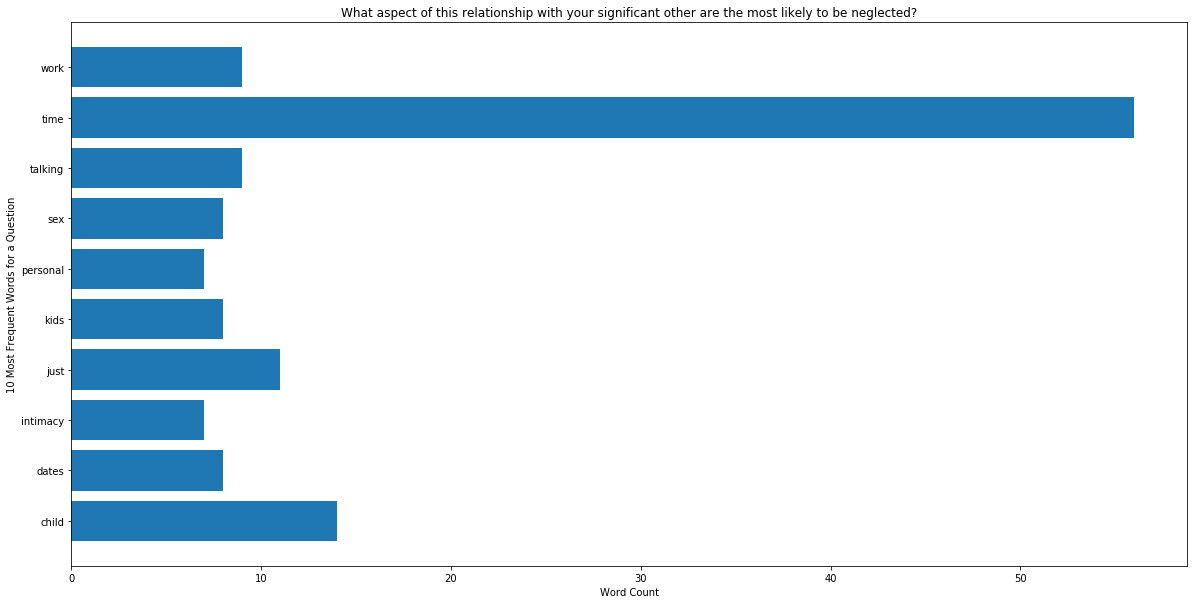

Q81
0          (children, 6)
1            (church, 7)
2            (close, 13)
3    (close friends, 11)
4           (family, 37)
5            (friend, 9)
6          (friends, 63)
7    (friends family, 7)
8              (kids, 6)
9               (son, 6)
Name: Q81, dtype: object


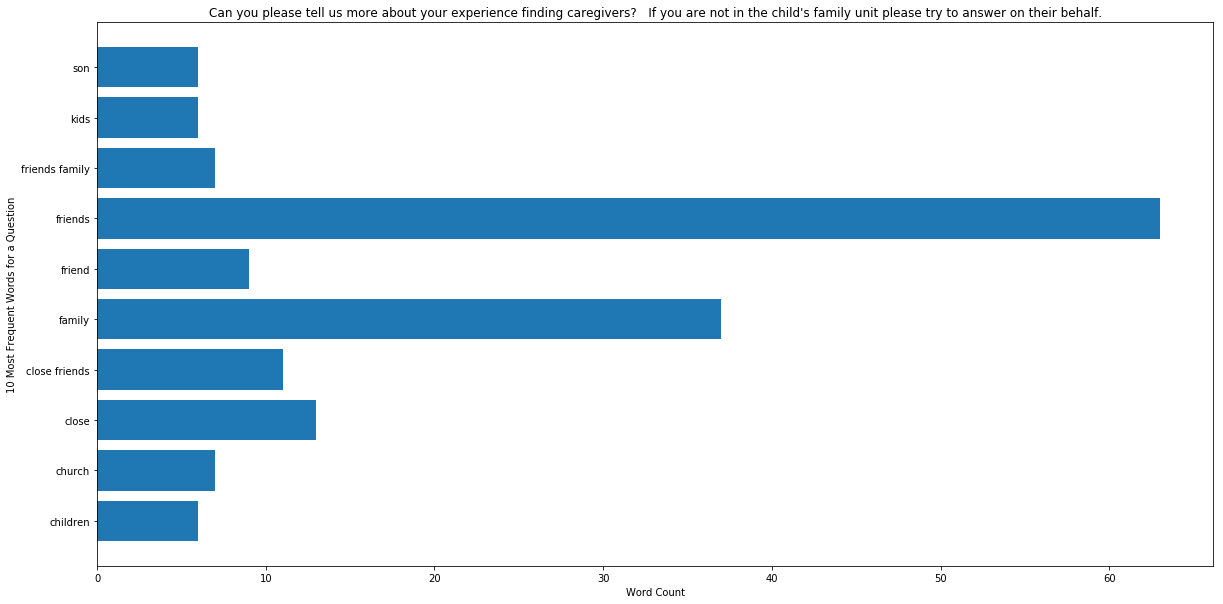

Q82
0             (care, 4)
1         (daughter, 6)
2             (didn, 7)
3              (lot, 5)
4         (personal, 4)
5    (personal time, 4)
6           (really, 5)
7              (son, 7)
8            (time, 24)
9             (yes, 23)
Name: Q82, dtype: object


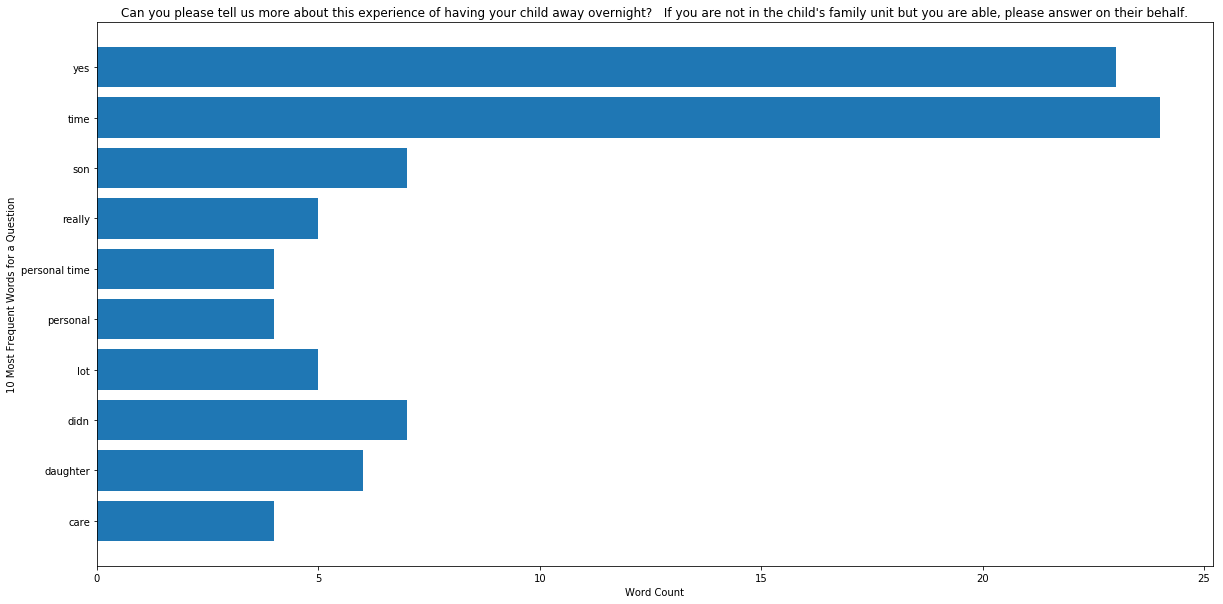

Q84
0      (coffee, 10)
1    (exercise, 34)
2     (friends, 37)
3       (lunch, 20)
4       (movies, 9)
5        (read, 48)
6      (reading, 8)
7          (spa, 8)
8        (time, 14)
9        (walk, 11)
Name: Q84, dtype: object


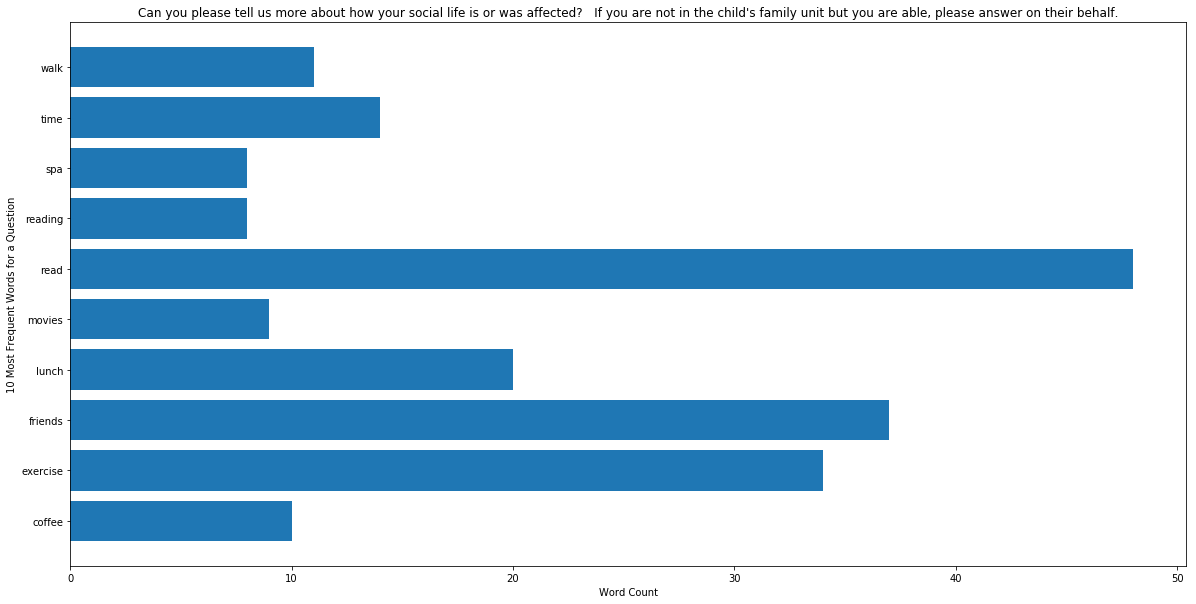

Q92
0       (anxiety, 33)
1    (depression, 20)
2           (don, 12)
3        (health, 12)
4           (lot, 11)
5          (ptsd, 11)
6         (sleep, 17)
7        (stress, 14)
8          (time, 30)
9        (weight, 11)
Name: Q92, dtype: object


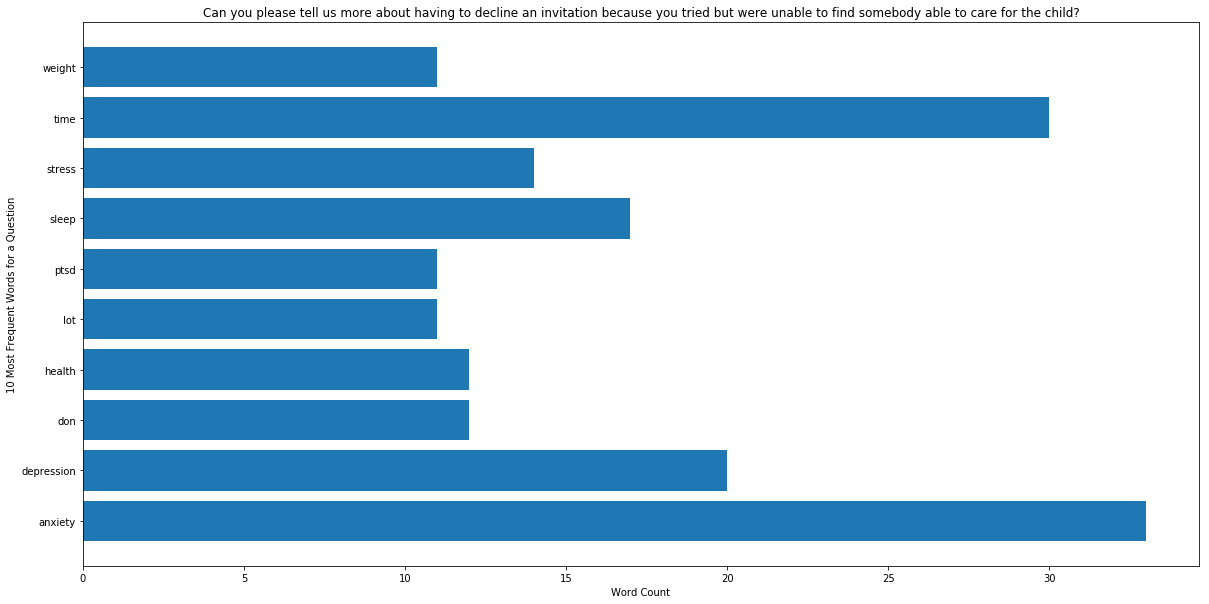

Q98
0           (children, 36)
1    (children husband, 8)
2           (daughter, 11)
3             (family, 54)
4     (family friends, 16)
5            (friends, 29)
6                 (god, 9)
7            (husband, 29)
8               (kids, 32)
9                (son, 10)
Name: Q98, dtype: object


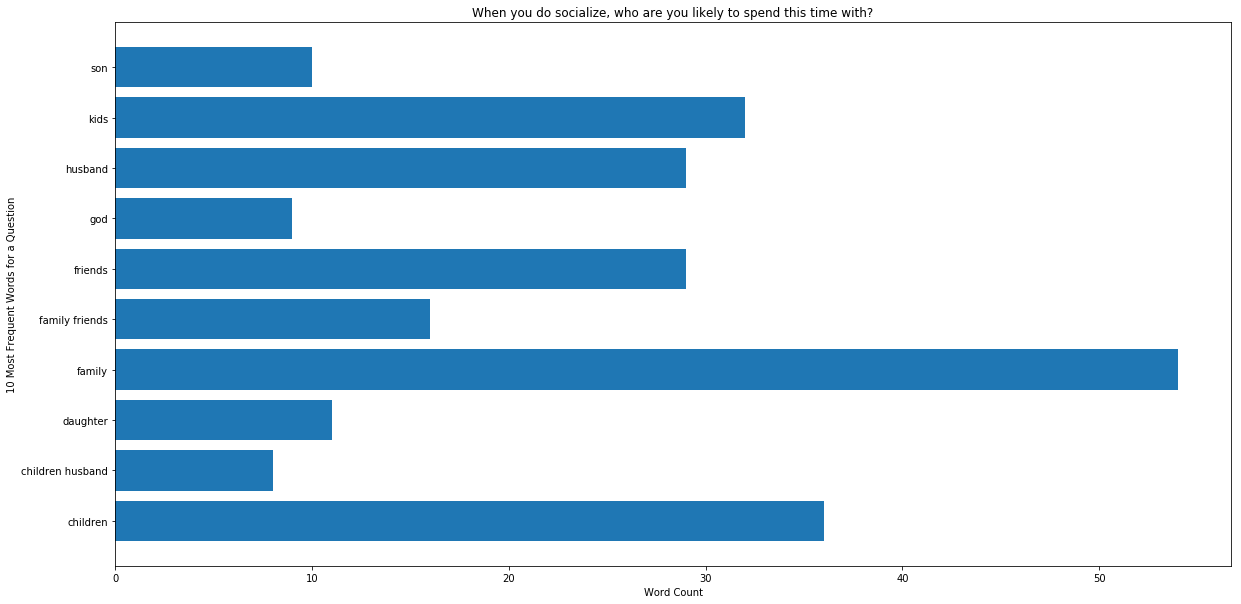

Q99
0      (cancer, 20)
1       (child, 14)
2    (children, 12)
3    (daughter, 13)
4      (family, 19)
5    (finances, 14)
6      (health, 31)
7       (money, 29)
8         (son, 21)
9        (work, 13)
Name: Q99, dtype: object


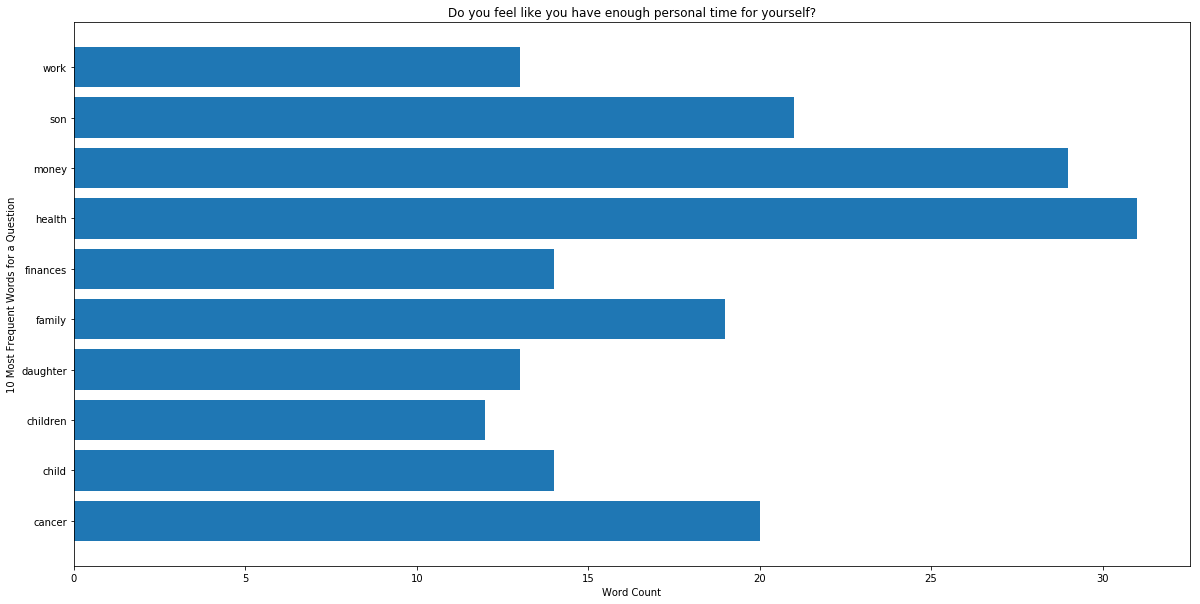

Q101
0          (board, 20)
1    (board games, 18)
2        (camping, 16)
3          (games, 47)
4          (going, 13)
5         (hiking, 14)
6         (movies, 36)
7           (park, 12)
8           (play, 22)
9         (sports, 11)
Name: Q101, dtype: object


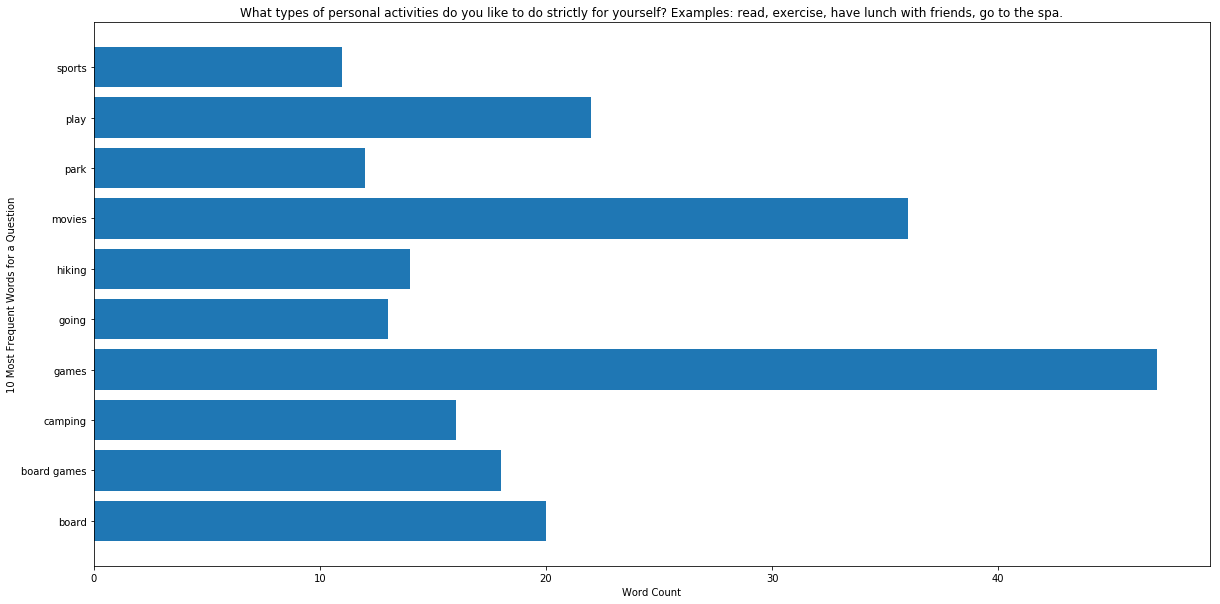

Q119
0       (able, 9)
1     (bills, 12)
2      (care, 11)
3    (family, 13)
4       (home, 8)
5     (income, 8)
6    (medical, 8)
7     (money, 17)
8      (time, 11)
9      (work, 13)
Name: Q119, dtype: object


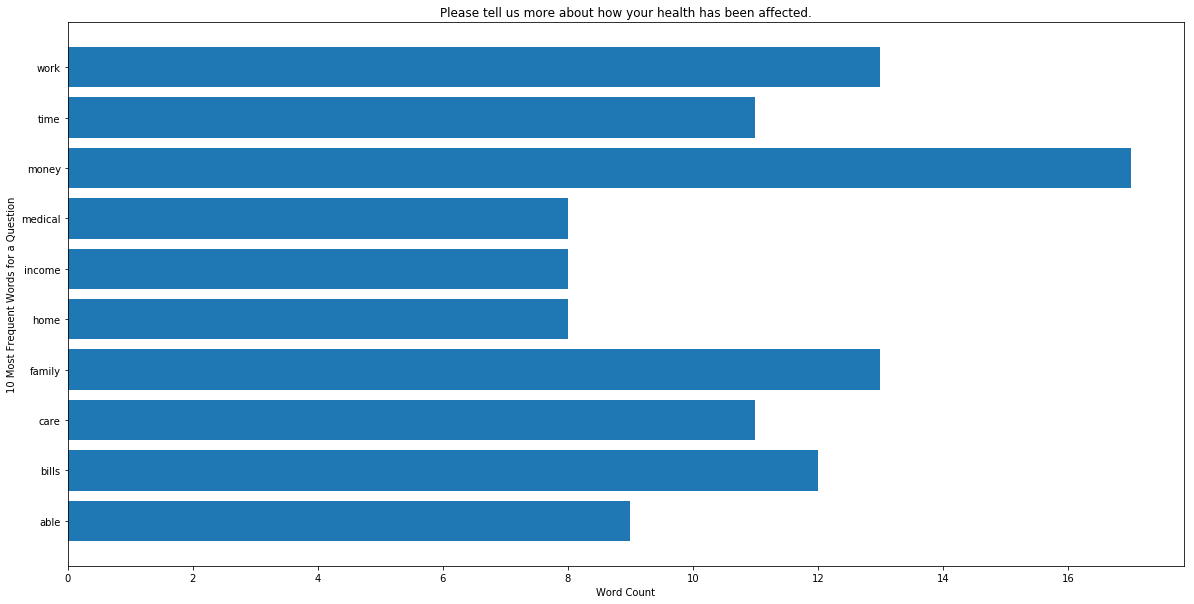

Q121
0           (days, 9)
1    (exhausting, 18)
2          (hard, 11)
3          (home, 11)
4      (hospital, 26)
5           (room, 9)
6         (sleep, 10)
7         (stayed, 8)
8     (stressful, 24)
9          (time, 14)
Name: Q121, dtype: object


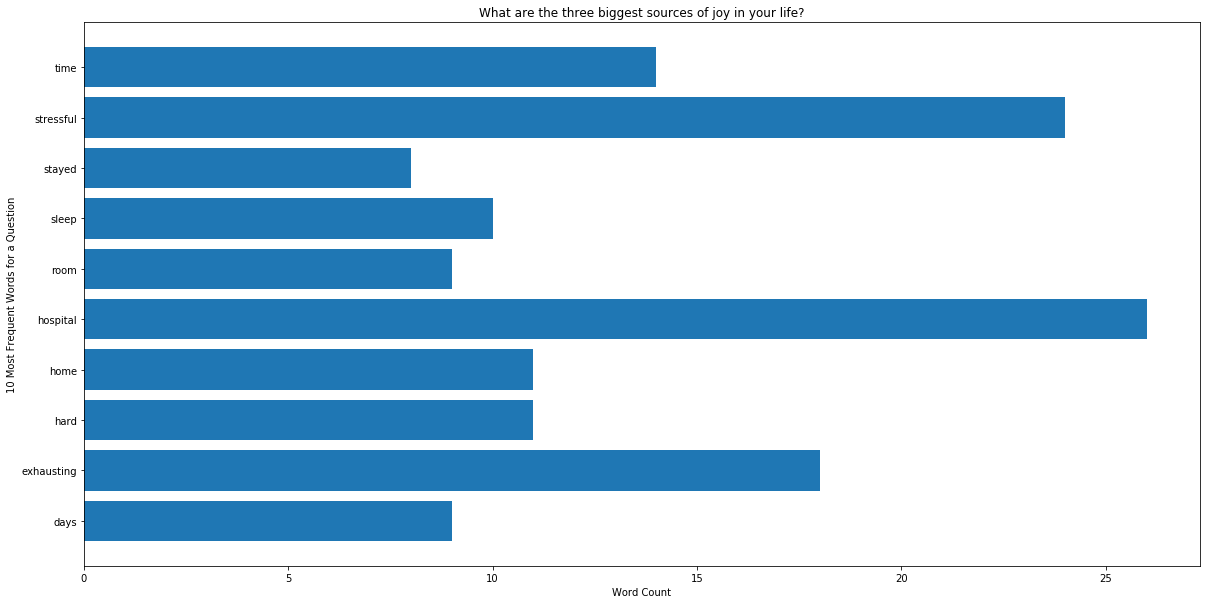

Q122
0        (bed, 36)
1     (family, 19)
2       (food, 23)
3      (having, 8)
4       (home, 11)
5       (kids, 10)
6       (pets, 10)
7    (privacy, 15)
8      (sleep, 11)
9      (space, 12)
Name: Q122, dtype: object


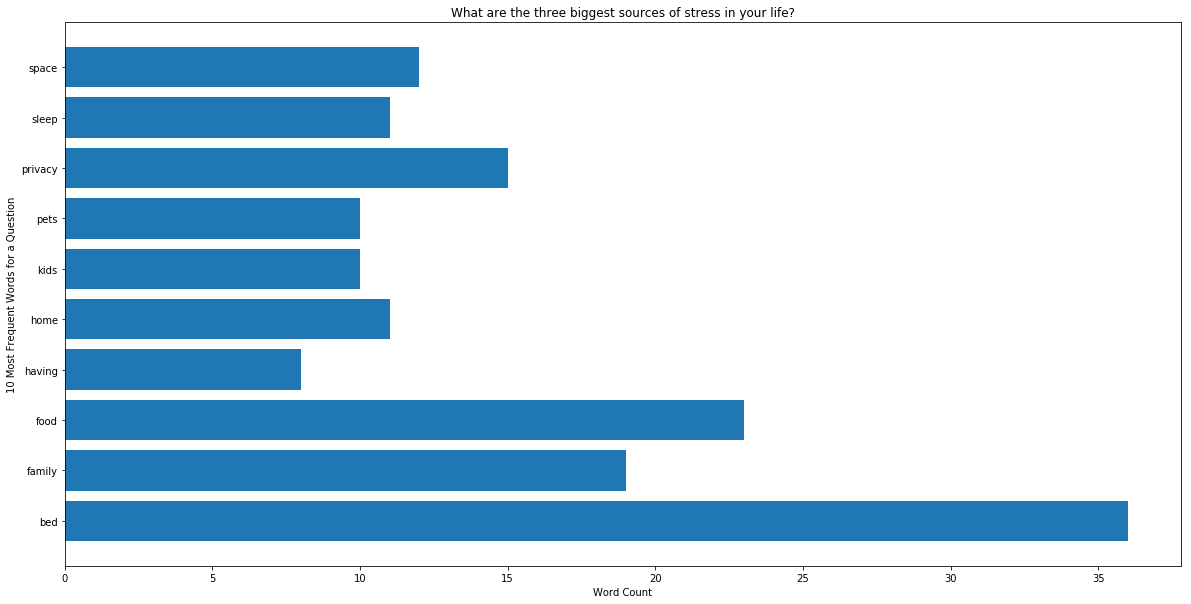

Q123
0        (bed, 17)
1     (brother, 8)
2     (family, 19)
3        (food, 8)
4    (friends, 22)
5       (home, 14)
6        (pets, 8)
7        (room, 9)
8    (sleeping, 8)
9       (toys, 15)
Name: Q123, dtype: object


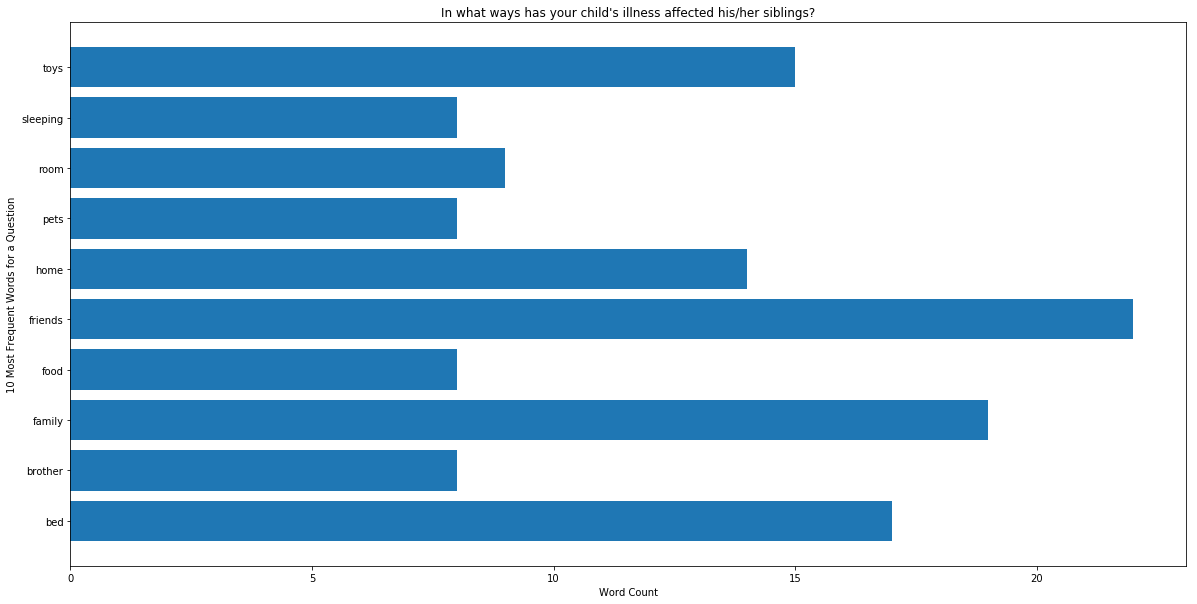

Q124
0            (care, 16)
1           (child, 12)
2          (doctors, 9)
3             (help, 8)
4         (hospital, 8)
5             (life, 8)
6          (medical, 9)
7          (nurses, 59)
8    (nurses nurses, 8)
9           (staff, 24)
Name: Q124, dtype: object


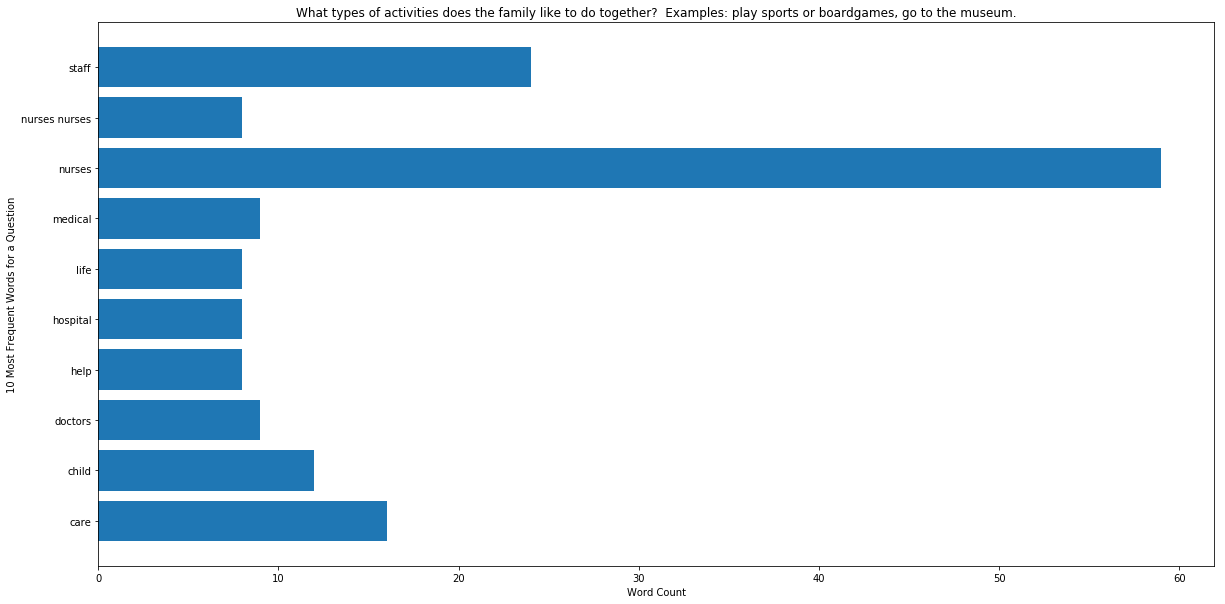

Q125
0        (bed, 10)
1     (better, 25)
2       (food, 28)
3    (hospital, 8)
4         (let, 8)
5    (parents, 11)
6      (people, 9)
7        (room, 8)
8    (sleeping, 7)
9        (time, 8)
Name: Q125, dtype: object


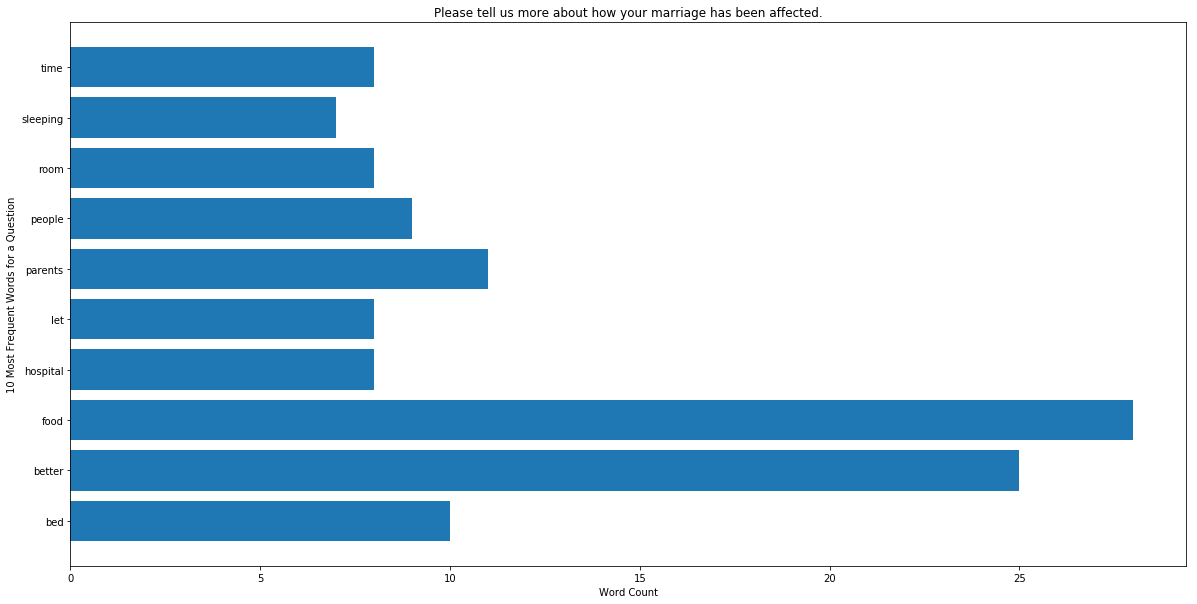

Q128
0       (assistance, 92)
1            (daily, 74)
2     (daily living, 74)
3          (errands, 74)
4    (errands meals, 74)
5            (help, 145)
6       (house yard, 74)
7           (living, 74)
8         (support, 113)
9     (yard errands, 74)
Name: Q128, dtype: object


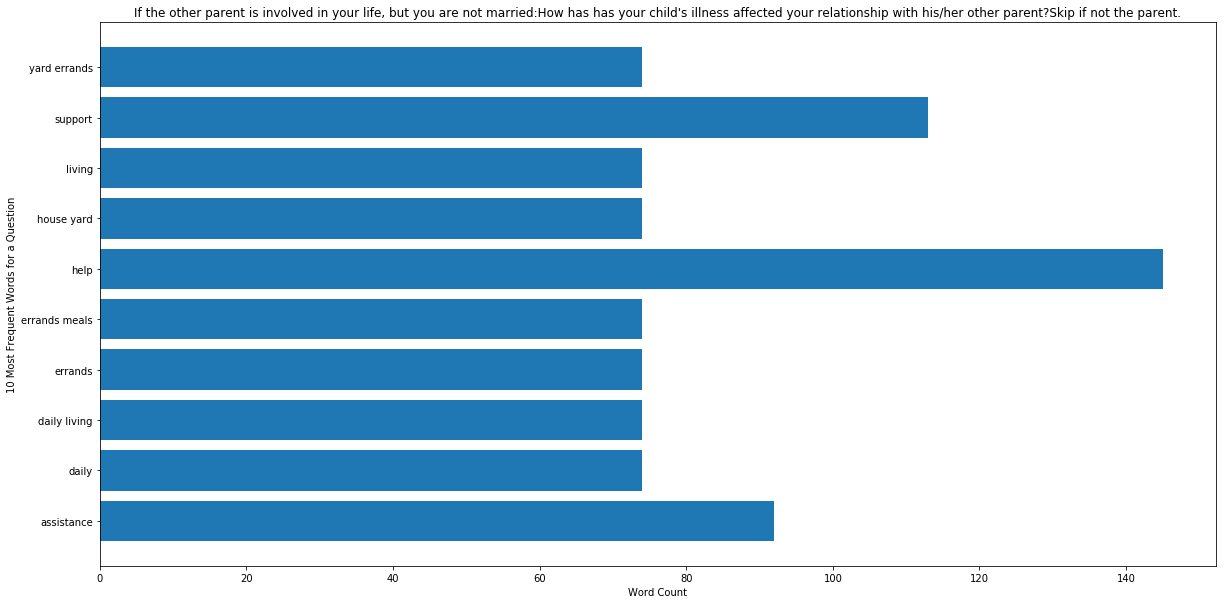

In [23]:
for i,column in enumerate(df_nlp_words.columns):
    #print column 
    print (column)
    
    #gathering my tuples for a given question
    tuple_entry = df_nlp_words[column]
    print(tuple_entry)
    #unpack that tuple in a dictionary
    data = dict((x, y) for x, y in tuple_entry)
    names = list(data.keys())
    values = list(data.values())
    
    plt.figure(figsize=(20,10))

    plt.barh(range(len(data)), values, tick_label=names)
    plt.xlabel('Word Count')
    plt.ylabel('10 Most Frequent Words for a Question')
    
    plt.title(list_of_questions[i])
        

    plt.savefig(f'bar_graph_{column}_nlp.png')
    plt.show()